<a href="https://colab.research.google.com/github/mieramensatu/Data-mining/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('../Dataset/student_performance_prediction.csv')
df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


In [30]:
df.describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,38005.000000,38008.000000,38006.000000
mean,9.962744,75.276323,65.440107
std,5.031154,20.393418,16.503119
min,-12.300000,-14.300000,8.300000
25%,6.600000,61.600000,55.100000
50%,10.000000,75.300000,65.200000
75%,13.400000,88.800000,75.200000
max,32.400000,150.200000,200.000000


In [31]:
df.shape

(40000, 7)

In [32]:
df.isnull().sum()

Student ID                                        0
Study Hours per Week                           1995
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64

In [33]:
df.columns

Index(['Student ID', 'Study Hours per Week', 'Attendance Rate',
       'Previous Grades', 'Participation in Extracurricular Activities',
       'Parent Education Level', 'Passed'],
      dtype='object')

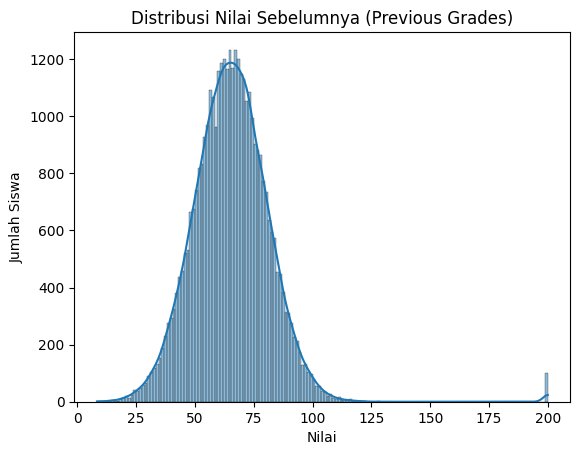

In [34]:
sns.histplot(df['Previous Grades'], kde=True)
plt.title('Distribusi Nilai Sebelumnya (Previous Grades)')
plt.xlabel('Nilai')
plt.ylabel('Jumlah Siswa')
plt.show()

In [35]:
def categorize(score):
  if score >= 80:
    return 'High'
  elif score >= 60:
    return 'Medium'
  else:
    return 'Low'

In [36]:
df['performance'] = df['Previous Grades'].apply(categorize)
df['performance'].value_counts()

performance
Medium    18030
Low       15809
High       6161
Name: count, dtype: int64

In [37]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [38]:
df.columns

Index(['student_id', 'study_hours_per_week', 'attendance_rate',
       'previous_grades', 'participation_in_extracurricular_activities',
       'parent_education_level', 'passed', 'performance'],
      dtype='object')

In [39]:
num_cols = ['study_hours_per_week', 'attendance_rate', 'previous_grades']
for col in num_cols:
  df[col].fillna(df[col].median(), inplace=True)

C:\Users\lenov\AppData\Local\Temp\ipykernel_6932\3676676016.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\lenov\AppData\Local\Temp\ipykernel_6932\3676676016.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [40]:
cat_cols = ['participation_in_extracurricular_activities', 'parent_education_level', 'passed']
for col in cat_cols:
  df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\lenov\AppData\Local\Temp\ipykernel_6932\3899735159.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [41]:
df.isnull().sum()

student_id                                     0
study_hours_per_week                           0
attendance_rate                                0
previous_grades                                0
participation_in_extracurricular_activities    0
parent_education_level                         0
passed                                         0
performance                                    0
dtype: int64

In [42]:
df.columns

Index(['student_id', 'study_hours_per_week', 'attendance_rate',
       'previous_grades', 'participation_in_extracurricular_activities',
       'parent_education_level', 'passed', 'performance'],
      dtype='object')

In [43]:
df.to_csv('../Dataset/clean_student_data.csv', index=False)